In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
riskspan = pd.read_excel('C:\\Users\\dchua\\Desktop/Copy of RiskSpanSkillsAssessment.xlsx',sheet_name = 'Data')

In [19]:
riskspan.shape

(2000, 29)

In [20]:
riskspan.head()

,LOAN_NUMBER,SAMPLE_DATE,FILE_REQ_DATE,SECOND_REQUEST_DATE,SENT_TO_IMAGING_DATE,LENDER_RESPONSE_DUE_DATE,DATE_LOAN_FINALIZED,LENDER_ID,LENDER_NAME,LENDER_LOAN_ID,...,FIELD_REVIEW_VALUE_SUPPORTED,FIELD_REVIEW_VALUE,PURPOSE_CODE,OCCUPANCY_CODE,LENDER_INST_TYPE_DESCRIPTION,UNDERWRITER_NAME,REVIEW_DATE,REVIEW_STATUS,DEAL_NAME,START_DATE
0,19457569,2010-11-22,2010-11-25,NaT,NaT,NaT,2011-01-24,ZMFHQJ,"Wells Fargo Bank, N.A.",26291118,...,NaN,NaN,P,B,Bank Owned Mortgage Company - National,Mike Willams,2011-01-13,4.0,WFMBS 2006-5,2013-06-01
1,16864087,2012-04-03,2012-04-05,2012-04-20,NaT,NaT,2012-04-24,NXYFBZ,"Wells Fargo Bank, N.A.",381247287,...,NaN,NaN,R,B,Bank Owned Mortgage Company - National,Mike Willams,2012-04-23,4.0,WFMBS 2006-AR4,2013-06-01
2,17137579,2012-06-27,2012-06-27,NaT,2012-07-13,NaT,2012-07-20,CKZGQU,Cobalt Mortgage Inc,38200028,...,NaN,NaN,P,B,Mortgage Banker - Bank Owned,Mike Willams,2012-07-20,4.0,WFMBS 2006-AR4,2013-06-01
3,20382551,2012-10-08,2012-10-11,NaT,2012-10-26,NaT,2012-12-10,DMYYBZ,McLean Mortgage Corporation,416297794,...,NaN,NaN,P,B,Mortgage Banker - Bank Owned,Eric Miller,2012-11-30,4.0,WFMBS 2006-5,2013-06-01
4,23078618,2012-10-04,2012-10-08,NaT,2012-10-22,NaT,2012-10-25,WIXLJR,LoanCare Servicing Center Inc,6967335,...,NaN,NaN,X,B,Mortgage Banker - (Large),Mike Willams,2012-10-23,4.0,WFMBS 2006-5,2013-06-01


In [91]:
riskspan.LENDER_INST_TYPE_DESCRIPTION.unique()
riskspan.isnull().sum()

LOAN_NUMBER                        0
SAMPLE_DATE                        0
FILE_REQ_DATE                     70
SECOND_REQUEST_DATE             1768
SENT_TO_IMAGING_DATE             648
LENDER_RESPONSE_DUE_DATE        1888
DATE_LOAN_FINALIZED              197
LENDER_ID                          0
LENDER_NAME                        0
LENDER_LOAN_ID                    76
PROP_STATE                         0
NEW_CONSTRUCTION_INDICATOR         0
CONDOMINIUM_INDICATOR              0
LOAN_ORIG_DATE                    16
CURRENT_BALANCE                    0
FICO_SCORE                         0
LTV                                0
ORIG_VALUE                        54
AVM_VALUE                       1705
FIELD_REVIEW_VALUE_SUPPORTED    1981
FIELD_REVIEW_VALUE              1985
PURPOSE_CODE                       0
OCCUPANCY_CODE                     0
LENDER_INST_TYPE_DESCRIPTION       0
UNDERWRITER_NAME                 222
REVIEW_DATE                      222
REVIEW_STATUS                    170
D

In [170]:
riskspan.LENDER_INST_TYPE_DESCRIPTION.value_counts()

Mortgage Banker - Bank Owned              661
Community Banks                           499
Credit Unions                             374
Mortgage Banker - (Large)                 279
Bank Owned Mortgage Company - National    187
Name: LENDER_INST_TYPE_DESCRIPTION, dtype: int64

In [206]:
riskspan.pivot_table('CURRENT_BALANCE','LENDER_INST_TYPE_DESCRIPTION',aggfunc=[np.mean,np.max,np.min], margins = True)

,mean,amax,amin
,CURRENT_BALANCE,CURRENT_BALANCE,CURRENT_BALANCE
LENDER_INST_TYPE_DESCRIPTION,,,
Bank Owned Mortgage Company - National,242899.802139,720000,43225
Community Banks,211839.963928,729750,28500
Credit Unions,175149.601604,578250,22500
Mortgage Banker - (Large),260374.383513,729750,59000
Mortgage Banker - Bank Owned,236262.689864,625500,25018
All,222725.223500,729750,22500


In [174]:
riskspan.LTV.isnull().sum()

0

In [175]:
riskspan.loc[riskspan['LTV']<=85,'LTV_type'] = '<=85%'
riskspan.loc[(riskspan['LTV']>85) & (riskspan['LTV']<=90),'LTV_type'] = '>85% and <= 90%'
riskspan.loc[(riskspan['LTV']>90) & (riskspan['LTV']<=95),'LTV_type'] = '>90% and <= 95%'
riskspan.loc[riskspan['LTV']>=95,'LTV_type'] = '>95%'

In [207]:
riskspan.LTV_type.value_counts(sort = False)

>85% and <= 90%    823
>95%               592
>90% and <= 95%    241
<=85%              344
Name: LTV_type, dtype: int64

In [205]:
riskspan.pivot_table('CURRENT_BALANCE','LTV_type',aggfunc=[np.mean,np.max,np.min], margins = True)

,mean,amax,amin
,CURRENT_BALANCE,CURRENT_BALANCE,CURRENT_BALANCE
LTV_type,,,
<=85%,223985.912791,729750,43300
>85% and <= 90%,235966.178615,729750,22500
>90% and <= 95%,222573.253112,440752,35000
>95%,203646.915541,561700,28500
All,222725.223500,729750,22500


In [178]:
import datetime as dt
riskspan.dtypes
riskspan.LOAN_ORIG_DATE.isnull().sum()

16

In [179]:
riskspan['LoanAge'] =(2013-riskspan.LOAN_ORIG_DATE.dt.year)*12 + (6 - riskspan.LOAN_ORIG_DATE.dt.month )

In [196]:
pd.to_numeric(riskspan.LoanAge)
riskspan.LoanAge.fillna(-1,inplace = True)

In [197]:
riskspan.loc[riskspan['LoanAge']==-1,'LoanAgetype']  = 'Unknown'
riskspan.loc[(riskspan['LoanAge']>-1) & (riskspan['LoanAge']<=9),'LoanAgetype'] = '0-9 Months'
riskspan.loc[(riskspan['LoanAge']>9) & (riskspan['LoanAge']<=19),'LoanAgetype'] = '10-19 Months'
riskspan.loc[(riskspan['LoanAge']>19) & (riskspan['LoanAge']<=29),'LoanAgetype'] = '20-29 Months'
riskspan.loc[(riskspan['LoanAge']>29) & (riskspan['LoanAge']<=39),'LoanAgetype'] = '30-39 Months'
riskspan.loc[riskspan['LoanAge']>=40,'LoanAgetype'] = '>=40 Months'

In [198]:
riskspan.LoanAgetype.isnull().sum()

0

In [199]:
riskspan.LoanAgetype.value_counts(sort = False)

20-29 Months    564
10-19 Months    724
0-9 Months      242
Unknown          16
30-39 Months    268
>=40 Months     186
Name: LoanAgetype, dtype: int64

In [208]:
riskspan.pivot_table('CURRENT_BALANCE','LoanAgetype',aggfunc=[np.mean,np.max,np.min], margins = True)

,mean,amax,amin
,CURRENT_BALANCE,CURRENT_BALANCE,CURRENT_BALANCE
LoanAgetype,,,
0-9 Months,233615.673554,562500,45000
10-19 Months,229611.947514,720000,25018
20-29 Months,216680.785461,729750,22500
30-39 Months,204076.171642,546376,41705
>=40 Months,224049.580645,729750,35000
Unknown,256425.312500,404700,88065
All,222725.223500,729750,22500


In [209]:
riskspan.FICO_SCORE.isnull().sum()

0

In [210]:
riskspan.loc[riskspan['FICO_SCORE']<600,'FICO_type'] = '<600'
riskspan.loc[(riskspan['FICO_SCORE']>=600) & (riskspan['FICO_SCORE']<=699),'FICO_type'] = '600-699'
riskspan.loc[(riskspan['FICO_SCORE']>700) & (riskspan['FICO_SCORE']<=799),'FICO_type'] = '700-799'
riskspan.loc[riskspan['FICO_SCORE']>=800,'FICO_type'] = '>=800'

In [291]:
a = pd.crosstab(riskspan['LTV_type'],riskspan['FICO_type'],values =riskspan['CURRENT_BALANCE'],aggfunc = np.sum)
a.fillna(0,inplace = True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

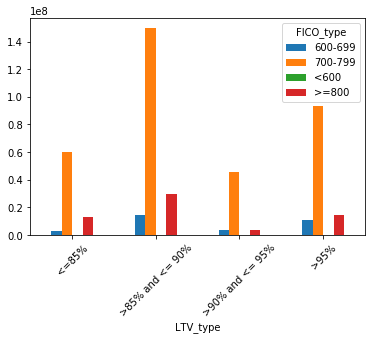

In [292]:
import matplotlib.pyplot as plt
a.plot(kind = 'bar')
plt.xticks(rotation = 45)